In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("C:\\Users\\Downloads\\Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes   
0                  Jalsa          Yes        Yes  4.1/5    775  \
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.

In [15]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes   
0                  Jalsa          Yes        Yes   4.1    775  \
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no NULL Values

Text(0.5, 0, 'Type of restaurant')

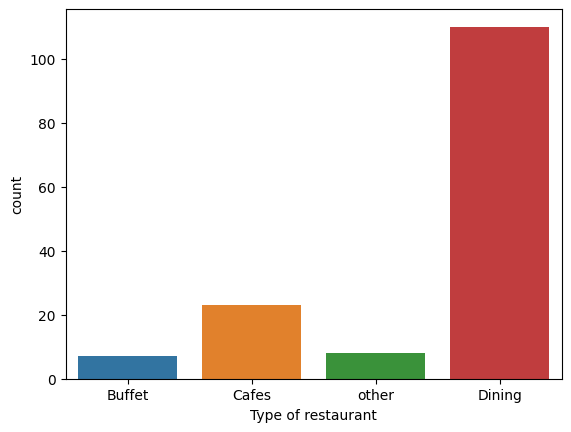

In [17]:
#Let's explore the listed_in(type) column
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

The majority of the retaurants fall into the dinning category

Text(0, 0.5, 'Votes')

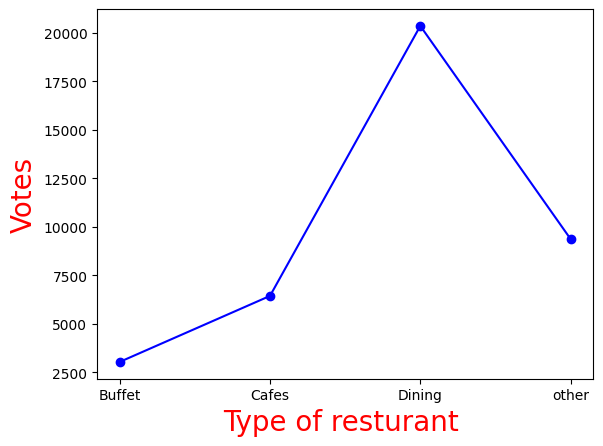

In [24]:
group_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c="blue",marker="o")
plt.xlabel("Type of resturant ",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

Dining restaurants are preferred by a larger number of individuals.

In [25]:
#will determine the restaurant’s name that received the maximum votes based on a given dataframe.
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

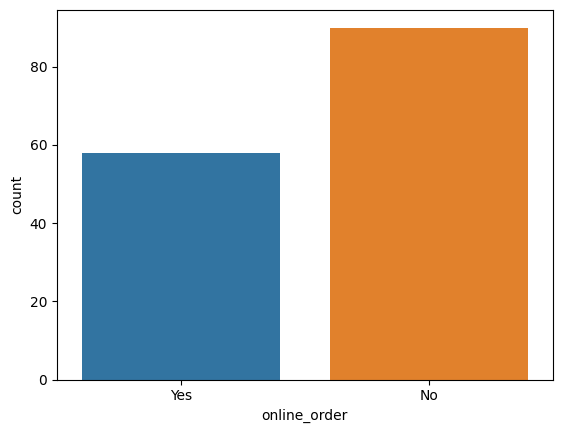

In [30]:
sns.countplot(x=df['online_order'])

<Axes: xlabel='approx_cost(for two people)', ylabel='name'>

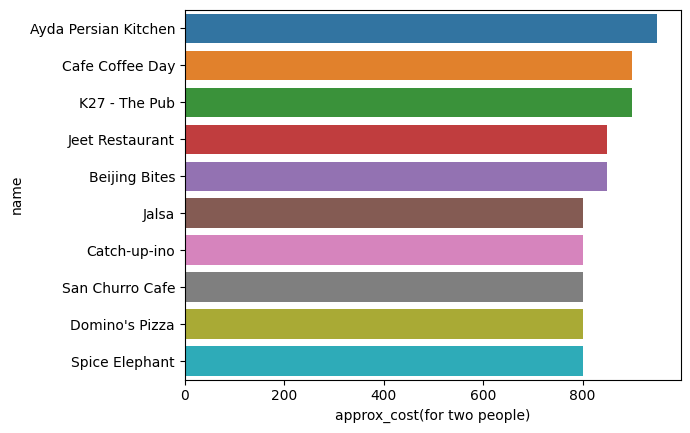

In [34]:
# the top 10 restaurants based on the 'approx_cost(for two people)' column and their corresponding names
top_10_restaurants = df.sort_values(by='approx_cost(for two people)', ascending=False).head(10)

sns.barplot(x='approx_cost(for two people)', y='name', data=top_10_restaurants)


In [41]:
# find the maximum value of the 'online_order' column for those restaurants.
top_10_restaurants = df.sort_values(by='approx_cost(for two people)', ascending=False).head(10)


max_online_order = top_10_restaurants['online_order'].max()


restaurants_with_max_online_order = top_10_restaurants[top_10_restaurants['online_order'] == max_online_order]['name']

print("Restaurant(s) with maximum online order status:")
for restaurant_name in restaurants_with_max_online_order:
    print(restaurant_name)

Restaurant(s) with maximum online order status:
Beijing Bites
Jalsa
Catch-up-ino
San Churro Cafe
Domino's Pizza
Spice Elephant


<Axes: xlabel='online_order', ylabel='rate'>

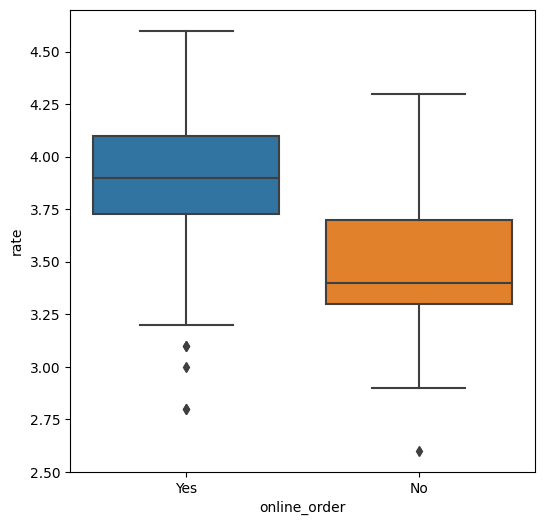

In [43]:
#we will examine whether online orders receive higher ratings than offline orders.
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

Online Order and Booking Table Analysis:

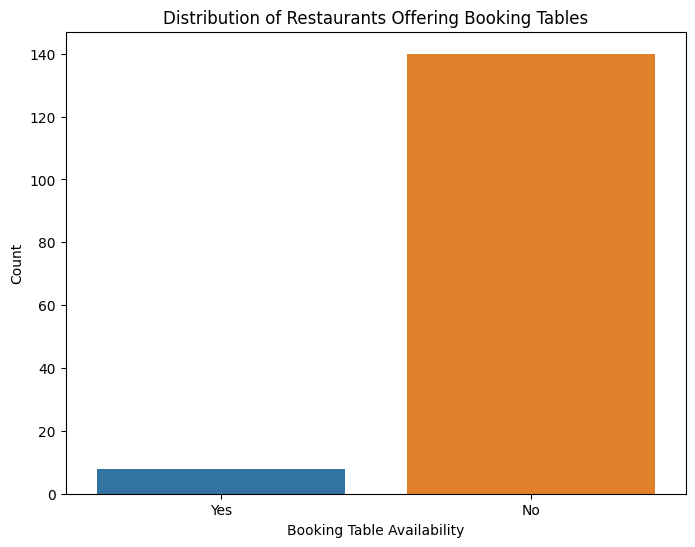

In [45]:


# Count plot for booking tables
plt.figure(figsize=(8, 6))
sns.countplot(x='book_table', data=df)
plt.title('Distribution of Restaurants Offering Booking Tables')
plt.xlabel('Booking Table Availability')
plt.ylabel('Count')
plt.show()

Rating Analysis

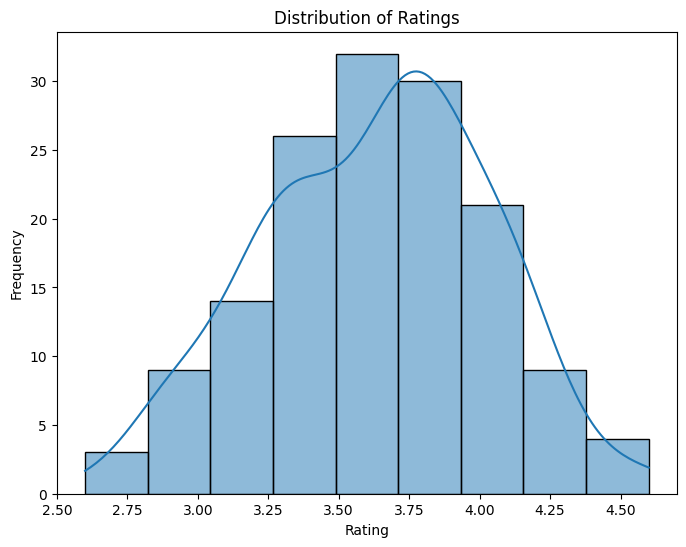

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Cost Analysis

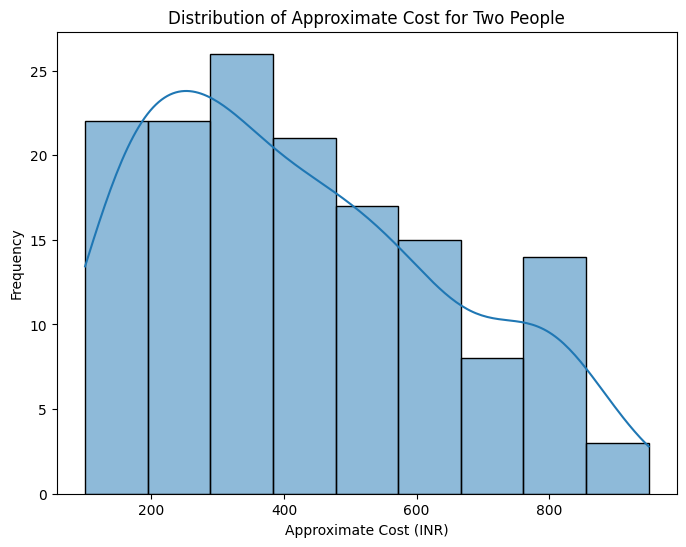

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df['approx_cost(for two people)'], kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost (INR)')
plt.ylabel('Frequency')
plt.show()


Relationship between Ratings and Votes:

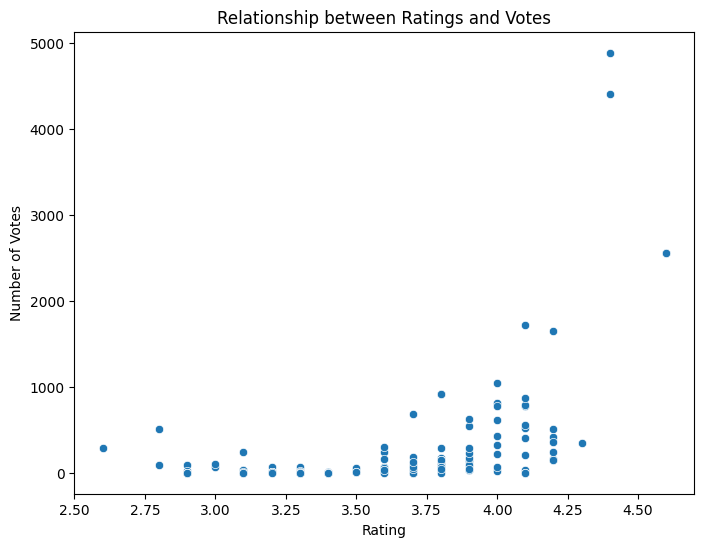

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rate', y='votes', data=df)
plt.title('Relationship between Ratings and Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.show()


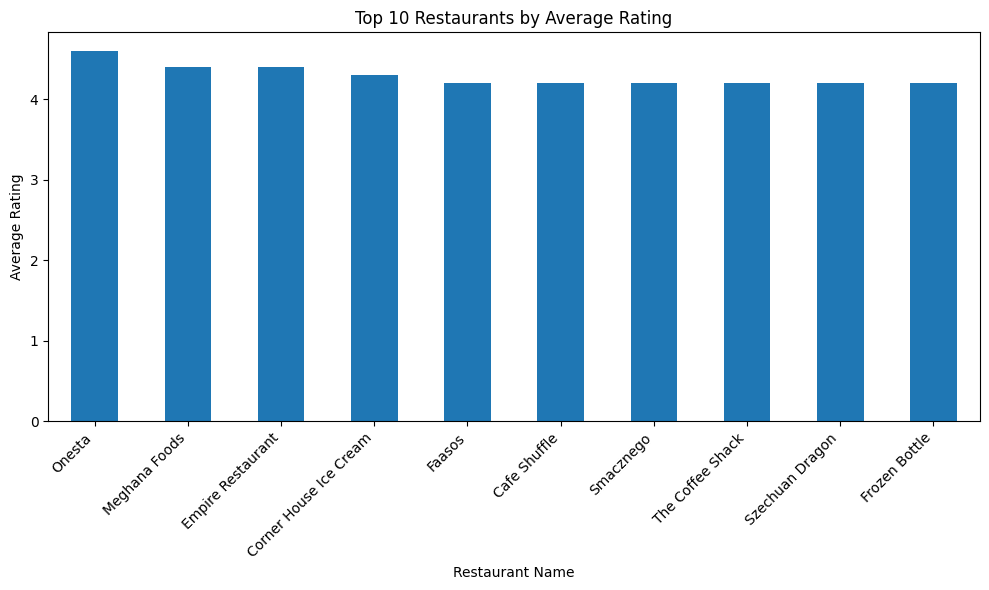

In [51]:
# Calculate the average rating for each restaurant
average_rating_per_restaurant = df.groupby('name')['rate'].mean().sort_values(ascending=False)

# Get the top 10 restaurants by average rating
top_10_restaurants_by_rating = average_rating_per_restaurant.head(10)

# Plot the top 10 restaurants by average rating
plt.figure(figsize=(10, 6))
top_10_restaurants_by_rating.plot(kind='bar')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [52]:
# Filter the dataset for restaurants offering buffet
buffet_restaurants = df[df['listed_in(type)'].str.contains('Buffet', case=False)]

# Sort the buffet restaurants based on any criteria (e.g., rating) and select the top 5
top_5_buffet_restaurants = buffet_restaurants.sort_values(by='rate', ascending=False).head(5)

# Print the top 5 buffet restaurants
print("Top 5 Buffet Restaurants:")
print(top_5_buffet_restaurants[['name', 'rate', 'votes']])


Top 5 Buffet Restaurants:
              name  rate  votes
0            Jalsa   4.1    775
1   Spice Elephant   4.1    787
2  San Churro Cafe   3.8    918
4    Grand Village   3.8    166
5  Timepass Dinner   3.8    286


In [58]:
# Filter the dataset for restaurants offering Dining
Dining_restaurants = df[df['listed_in(type)'].str.contains('Dining', case=False)]

# Sort the Dining restaurants based on any criteria (e.g., rating) and select the top 5
top_5_Dining_restaurants = Dining_restaurants.sort_values(by='rate', ascending=False).head(5)

# Print the top 5 Dining restaurants
print("Top 5 Dining Restaurants:")
print(top_5_Dining_restaurants[['name', 'rate', 'votes']])


Top 5 Dining Restaurants:
                                           name  rate  votes
86                                Meghana Foods   4.4   4401
52                       Corner House Ice Cream   4.3    345
81                                Frozen Bottle   4.2    146
37                              Szechuan Dragon   4.2   1647
76  Sri Guru Kottureshwara Davangere Benne Dosa   4.1    558


In [60]:
# Filter the dataset for restaurants offering Cafes
Cafes_restaurants = df[df['listed_in(type)'].str.contains('Cafes', case=False)]

# Sort the Cafes  based on any criteria (e.g., rating) and select the top 5
top_5_Cafes_restaurants = Cafes_restaurants.sort_values(by='rate', ascending=False).head(5)

# Print the top 5 Cafes restaurants
print("Top 5 Cafes Restaurants:")
print(top_5_buffet_restaurants[['name', 'rate', 'votes']])


Top 5 Cafes Restaurants:
                name  rate  votes
7             Onesta   4.6   2556
9          Smacznego   4.2    504
11      Cafe Shuffle   4.2    150
12  The Coffee Shack   4.2    164
10      Village Café   4.1    402


In [63]:
# Filter the dataset for restaurants offering buffet
buffet_restaurants = df[df['listed_in(type)'].str.contains('Buffet', case=False)]

# Sort the buffet restaurants based on any criteria (e.g., rating) and select the top 5
top_5_buffet_restaurants = buffet_restaurants.sort_values(by='rate', ascending=False).head(5)

# Print the top 5 buffet restaurants
print("Top 5 Buffet Restaurants:")
print(top_5_buffet_restaurants[['name', 'votes']])


Top 5 Buffet Restaurants:
              name  votes
0            Jalsa    775
1   Spice Elephant    787
2  San Churro Cafe    918
4    Grand Village    166
5  Timepass Dinner    286


In [61]:
# Find the restaurant with the highest number of votes among the top 5 Dining restaurants
for index,restaurant in top_5_Dining_restaurants.iterrows():
    restaurant_with_highest_votes=Dining_restaurants[Dining_restaurants['name']==restaurant['name']]
    highest_votes=restaurant_with_highest_votes['votes'].max()

    print(f"{restaurant['name']}:{highest_votes} votes")

Meghana Foods:4401 votes
Corner House Ice Cream:345 votes
Frozen Bottle:146 votes
Szechuan Dragon:1647 votes
Sri Guru Kottureshwara Davangere Benne Dosa:558 votes


In [62]:
# Find the restaurant with the highest number of votes among the top 5 Cafes restaurants
for index,restaurant in top_5_Cafes_restaurants.iterrows():
    
    restaurant_with_highest_votes=Cafes_restaurants[Cafes_restaurants['name']==restaurant['name']]
    highest_votes=restaurant_with_highest_votes['votes'].max()

    print(f"{restaurant['name']}:{highest_votes} votes")

Onesta:2556 votes
Smacznego:504 votes
Cafe Shuffle:150 votes
The Coffee Shack:164 votes
Village Café:402 votes


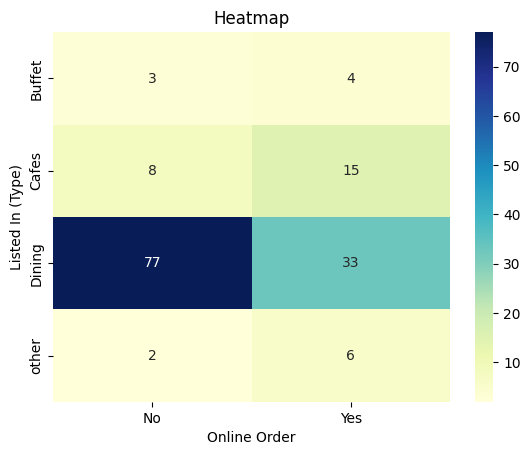

In [64]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.